In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [8]:

df = pd.read_csv('dataset.csv')


In [9]:
df.head()

,Places to Travel,Best Time to Travel,No of People Travel With,Days to Travel,Popularity
0,Barcelona,Autumn,5,10,9
1,Toronto,Autumn,3+,9,8
2,Rome,Summer,1+,6,4
3,Toronto,Autumn,2+,9,5
4,Istanbul,Summer,5+,7,6


In [10]:
df.dropna(inplace=True)

In [11]:
best_time_encoder = LabelEncoder()
people_travel_with_encoder = LabelEncoder()
days_to_travel_encoder = LabelEncoder()
no_of_people_travel_with=LabelEncoder()

In [12]:
df.head()

,Places to Travel,Best Time to Travel,No of People Travel With,Days to Travel,Popularity
0,Barcelona,Autumn,5,10,9
1,Toronto,Autumn,3+,9,8
2,Rome,Summer,1+,6,4
3,Toronto,Autumn,2+,9,5
4,Istanbul,Summer,5+,7,6


In [13]:
df['best_time_encoded'] = best_time_encoder.fit_transform(df['Best Time to Travel'])
df['people_travel_with_encoded'] = people_travel_with_encoder.fit_transform(df['No of People Travel With'])
df['days_to_travel'] = days_to_travel_encoder.fit_transform(df['Days to Travel'])

In [14]:
df.head()

,Places to Travel,Best Time to Travel,No of People Travel With,Days to Travel,Popularity,best_time_encoded,people_travel_with_encoded,days_to_travel
0,Barcelona,Autumn,5,10,9,0,7,6
1,Toronto,Autumn,3+,9,8,0,5,5
2,Rome,Summer,1+,6,4,2,1,2
3,Toronto,Autumn,2+,9,5,0,3,5
4,Istanbul,Summer,5+,7,6,2,8,3


In [15]:
X = df[['best_time_encoded', 'people_travel_with_encoded', 'days_to_travel']]
y = df['Places to Travel']

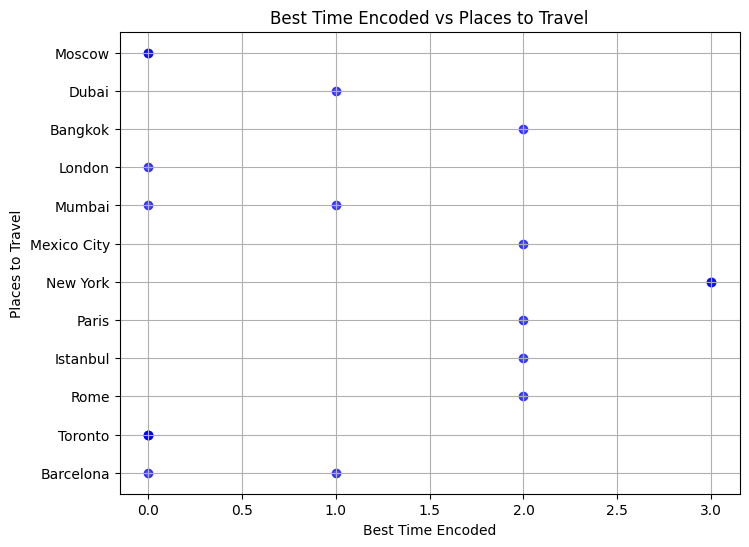

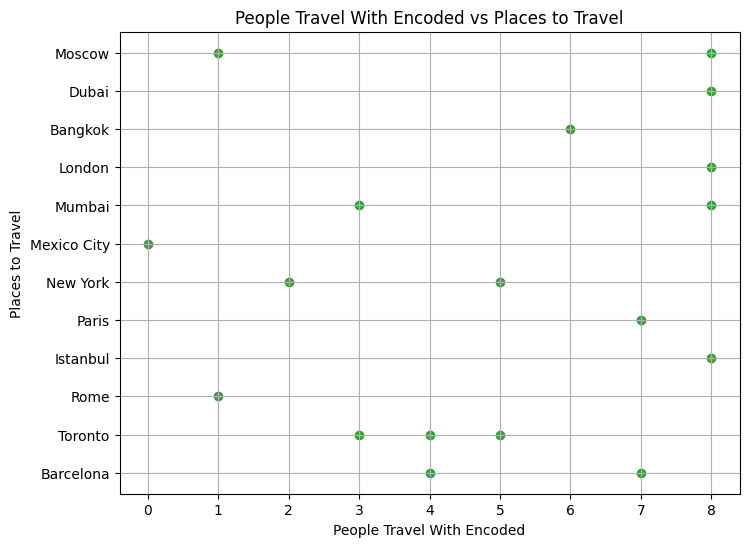

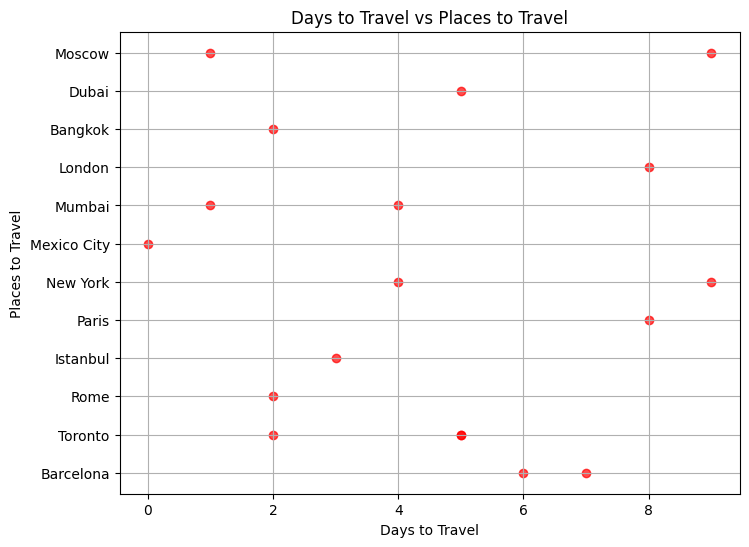

In [16]:
import matplotlib.pyplot as plt

# Scatter plot for 'best_time_encoded' vs 'Places to Travel'
plt.figure(figsize=(8, 6))
plt.scatter(df['best_time_encoded'], df['Places to Travel'], alpha=0.7, color='blue')
plt.title('Best Time Encoded vs Places to Travel')
plt.xlabel('Best Time Encoded')
plt.ylabel('Places to Travel')
plt.grid(True)
plt.show()

# Scatter plot for 'people_travel_with_encoded' vs 'Places to Travel'
plt.figure(figsize=(8, 6))
plt.scatter(df['people_travel_with_encoded'], df['Places to Travel'], alpha=0.7, color='green')
plt.title('People Travel With Encoded vs Places to Travel')
plt.xlabel('People Travel With Encoded')
plt.ylabel('Places to Travel')
plt.grid(True)
plt.show()

# Scatter plot for 'days_to_travel' vs 'Places to Travel'
plt.figure(figsize=(8, 6))
plt.scatter(df['days_to_travel'], df['Places to Travel'], alpha=0.7, color='red')
plt.title('Days to Travel vs Places to Travel')
plt.xlabel('Days to Travel')
plt.ylabel('Places to Travel')
plt.grid(True)
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Days to Travel']])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
import pickle

# Load model and encoders
with open('model.pkl', 'rb') as f:
    data = pickle.load(f)
    model = data['model']
    best_time_encoder = data['best_time_encoder']
    people_travel_with_encoder = data['people_travel_with_encoder']
    days_to_travel_encoder = data['days_to_travel_encoder']

def recommend_country(best_time, people_travel_with, days_to_travel):
    # Encode inputs using the encoders
    best_time_encoded = best_time_encoder.transform([best_time])[0]
    people_travel_with_encoded = people_travel_with_encoder.transform([people_travel_with])[0]
    days_to_travel_encoded = days_to_travel_encoder.transform([days_to_travel])[0]

    # Predict using the model
    prediction = model.predict([[best_time_encoded, people_travel_with_encoded, days_to_travel_encoded]])
    return prediction[0]

# Example
print(recommend_country('Summer', '2', '7'))


Rome


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
y_pred = model.predict(X_test)

In [15]:

def recommend_country(best_time, people_travel_with, days_to_travel):

    best_time_encoded = best_time_encoder.transform([best_time])[0]
    people_travel_with_encoded = people_travel_with_encoder.transform([people_travel_with])[0]
    days_to_travel_encoded = days_to_travel_encoder.transform([days_to_travel])[0]
    
    prediction = model.predict([[best_time_encoded, people_travel_with_encoded, days_to_travel_encoded]])
    return prediction[0]


In [16]:
df.head(10)

,Places to Travel,Best Time to Travel,No of People Travel With,Days to Travel,Popularity,best_time_encoded,people_travel_with_encoded,days_to_travel
0,Barcelona,Autumn,5,10,9,0,7,6
1,Toronto,Autumn,3+,9,8,0,5,5
2,Rome,Summer,1+,6,4,2,1,2
3,Toronto,Autumn,2+,9,5,0,3,5
4,Istanbul,Summer,5+,7,6,2,8,3
5,Paris,Summer,5,13,7,2,7,8
6,Toronto,Autumn,3,6,6,0,4,2
7,New York,Winter,3+,8,10,3,5,4
8,Barcelona,Spring,3,11,3,1,4,7
9,Mexico City,Summer,1,3,4,2,0,0


In [ ]:
best_time = input("Enter the best time to travel (Summer, Winter,Autumn,Spring): ")
people_travel_with = input("Enter the number of people traveling (e.g., 1, 2, 3): ")
days_to_travel = input("Enter the number of days you want to travel (e.g., 4, 7, 10): ")
recommended_country = recommend_country(best_time, people_travel_with, days_to_travel)
print(f"Recommended Country: {recommended_country}")

ValueError: y contains previously unseen labels: ''

In [18]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Save the model to a file
joblib.dump(y_pred, 'model2.pkl')


['model2.pkl']

In [1]:
import pickle


In [5]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model and encoders
with open('model.pkl', 'wb') as f:
    pickle.dump({'model': model, 
                 'best_time_encoder': best_time_encoder, 
                 'people_travel_with_encoder': people_travel_with_encoder, 
                 'days_to_travel_encoder': days_to_travel_encoder}, f)


NameError: name 'X' is not defined

In [ ]:
# accuracy=accuracy_score(y_test,y_pred)
# print(f"Model accuracy:{accuracy*100:.2f}%")